# Pymaceuticals Inc.
---

### Analysis

In this challenge we analyzed a dataset from 45 days of experiment on 249 mice using 10 different drugs. The goal is to demonstrate treatment results using Capomulin and compare it to other drugs. 51% of the experiments took place on male and 49% on female mice, also each drug regimen was tested on 10% of the sample.
After calculating statistical metrics we can demonstrate that Capomulin treatment has a result similar to Ramicane, which is better than other methods, meaning the mean, median and variance of tumor volumes with Capomulin and Ramicane is lower than the others. On the other hand, there were more number of tests for these two drug regimen so we have more accurate results on them than the others.
The boxplot also shows that Capomulin and Ramicane have better affect, and we can see the box for Capomulin is smaller than all of the others but the median is a little higher than Ramicane.
Overally we can say Capomulin is a good treatment. There is a chart showing the volume of tumor versus timepoints for a mouse treated with Capomulin which clearly indicates that this method is effective and we can understand from the last diagram that there's a linear relation between a mouse's weight and the tumor volume with a slope of 0.95 which shows the heavier the mouse is, the greater volume of tumors would be. 



In [314]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")
dataset = dataset[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
# Display the data table for preview
dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [315]:
# Checking the number of mice.
mice_n = dataset["Mouse ID"].nunique()
print(f"There's a total of {mice_n} mice tested.")

There's a total of 249 mice tested.


In [316]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = dataset.loc[dataset.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(f"Duplicated mouse ID : {duplicate_mouse}")

Duplicated mouse ID : ['g989']


In [317]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_series = dataset.loc[(dataset["Mouse ID"] == str(duplicate_mouse)[2:6]),:]
duplicated_mouse = duplicated_series["Mouse ID"].unique()
dataset = dataset[~dataset["Mouse ID"].isin(duplicated_mouse)]


In [318]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset = dataset.drop_duplicates(subset="Mouse ID",keep="last")
clean_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.000000,0,Ketapril,Male,15,29
20,x336,0,45.000000,0,Naftisol,Female,4,29
53,h428,0,45.000000,0,Ketapril,Female,1,27
55,v199,0,45.000000,0,Naftisol,Female,17,29
109,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [319]:
# Checking the number of mice in the clean DataFrame.
print(f'We have {len(clean_dataset["Mouse ID"])} mice.')

We have 248 mice.


## Summary Statistics

In [320]:
tumor_mean = dataset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = dataset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = dataset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std_dev = dataset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_std_err = dataset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [321]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = pd.DataFrame({"Mean Tumor Volume" : tumor_mean,
                      "Median Tumor Volume" : tumor_median,
                      "Tumor Volume Variance" : tumor_variance,
                      "Tumor Volume Std. Dev." : tumor_std_dev,
                      "Tumor Volume Std. Err." : tumor_std_err
})
stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Mean Tumor Volume'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Median Tumor Volume'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Tumor Volume Variance'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Tumor Volume Std. Dev.'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'Tumor Volume Std. Err.'),
  Text(4.5, 0, '')])

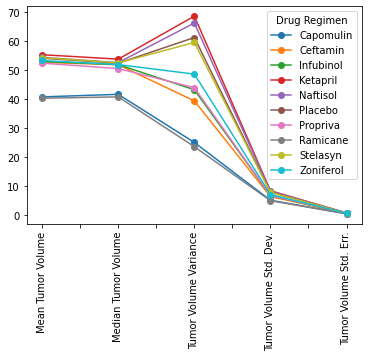

In [322]:
# visualizing last table for better understanding statistics
stats.transpose().plot(marker="o")
plt.xticks(rotation=90)

In [323]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
stats_agg = dataset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [324]:
count_drug = dataset.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

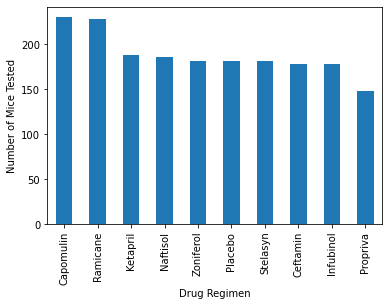

In [325]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_drug.plot(kind='bar', ylabel="Number of Mice Tested")

In [326]:
drug_df = pd.DataFrame(count_drug).reset_index()
drug_name = []
total_timepoint = []
for drug in range(len(drug_df)):
    drug_name.append(drug_df["Drug Regimen"][drug])
    total_timepoint.append(drug_df["Mouse ID"][drug])

Text(0, 0.5, 'Number of Mice Tested')

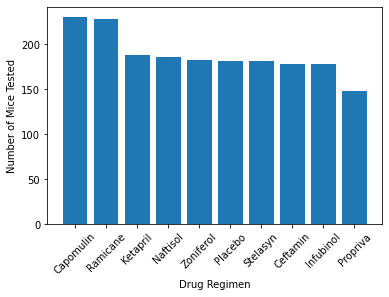

In [327]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_name, height=total_timepoint)
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

<AxesSubplot:>

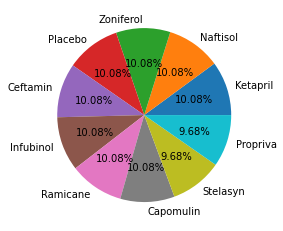

In [328]:
clean_dataset["Drug Regimen"].value_counts().plot.pie(ylabel="",autopct='%.2f%%')

<AxesSubplot:ylabel='Sex'>

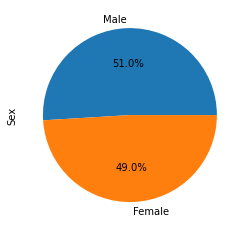

In [329]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dataset["Sex"].value_counts().plot.pie(autopct='%.1f%%')

Text(0, 0.5, 'Sex')

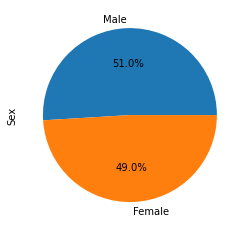

In [330]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = dataset["Sex"].value_counts()
labels = ["Male","Female"]
plt.pie(sex, labels=labels, autopct='%.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [331]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
total_volume = dataset.drop_duplicates(subset="Mouse ID",keep="last")
total_volume = total_volume.loc[(total_volume["Drug Regimen"]=="Capomulin")|
                         (total_volume["Drug Regimen"]=="Ramicane")|
                         (total_volume["Drug Regimen"]=="Infubinol")|
                         (total_volume["Drug Regimen"]=="Ceftamin"),:]


In [332]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_list = []
    
for drug in treatment_list:
    
    tumor_volume = clean_dataset.loc[clean_dataset["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    tumor_volume_list.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([0.25,0.5,0.75])
    
    first_quartile = quartiles[0.25]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    upper = third_quartile + (1.5*iqr)
    lower = first_quartile - (1.5*iqr)
    
    outlier = tumor_volume.loc[(tumor_volume < lower) | (tumor_volume > upper)]
    print(f"{drug}'s outlier is {outlier}")


Capomulin's outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outlier is 420    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

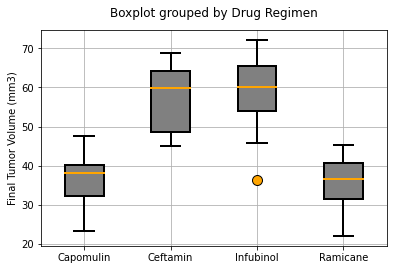

In [333]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
total_volume.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", patch_artist=True,
            boxprops=dict(facecolor="grey", color="black",linewidth=2),
            capprops=dict(color="black",linewidth=2),
            whiskerprops=dict(color="black",linewidth=2),
            flierprops=dict(color="orange", markeredgecolor="black", marker="o",markersize=10,markerfacecolor="orange"),
            medianprops=dict(color="orange",linewidth=2))
plt.title("")
plt.xlabel("")
plt.ylabel("Final Tumor Volume (mm3)")

<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

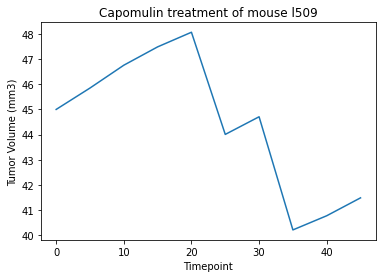

In [334]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509 = dataset.loc[(dataset["Mouse ID"] == "l509"),:]
l509.plot.line(x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin treatment of mouse l509",ylabel="Tumor Volume (mm3)",legend=False)

C:\Users\terme\AppData\Local\Temp\ipykernel_6372\3444477968.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_volume = pd.DataFrame(average_volume.groupby("Mouse ID")["Weight (g)","Tumor Volume (mm3)"].mean())


<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

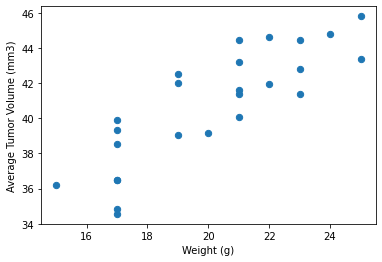

In [335]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_volume = dataset.loc[(dataset["Drug Regimen"] == "Capomulin"),:]
average_volume = pd.DataFrame(average_volume.groupby("Mouse ID")["Weight (g)","Tumor Volume (mm3)"].mean())
average_volume.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", ylabel="Average Tumor Volume (mm3)", s=40)

## Correlation and Regression

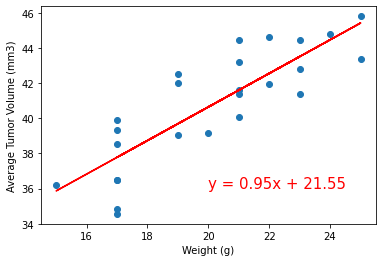

In [336]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"])
regression_line = average_volume["Weight (g)"]*slope + intercept
eqtn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"])
plt.plot(average_volume["Weight (g)"], regression_line, "r-")
plt.annotate(eqtn,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()